##### Copyright 2020 HRFlow's AI Research Department

Licensed under the Apache License, Version 2.0 (the "License");

In [0]:
# Copyright 2020 HRFlow's AI Research Department. All Rights Reserved.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
# ==============================================================================

# Profile API:

This notebook illustrates how to use **HRFlow's Profile API**. This API serves as an interface to upload resumes (either structured as a json or as a file located in your hard drive) and retrieve results from HRFlow. In the current version, the following results can be retrieved or used:
* The **parsed resume** 
* Any **attachments** that have been sent in an upload
* The **search engine** over your source of profiles
* The **scores** between your profiles and a given job
* The **embeddings** at various degree of granularity

An **example of applications** with the Profile API is available below. The example shows how **embeddings** can be leveraged to **classify resumes**. 

**Embeddings** eases the management of documents like resumes of jobs. It turns any highly structured image of a resume into a single **vector of numbers** with fixed length. 

The document embeddings can also be trivially used to compute **job or profile level meaning similarity** as well as to enable better performance on downstream classification tasks using **less supervised training data**.

**Disclaimer**: 


*   HR Resumes comes from google query '[cv hr](https://www.google.fr/search?q=cv+hr)'
*   Data Scientists Resumes comes from Google query '[cv data scientist](https://www.google.fr/search?q=cv+data+scientist)'

<p>
<table align="left"><td>
  <a target="_blank"  href="https://colab.research.google.com/github/Riminder/python-hrflow-api/blob/master/examples/colab/hrflow_profile_api.ipynb">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab
  </a>
</td><td>
  <a target="_blank"  href="https://github.com/Riminder/python-hrflow-api/blob/master/examples/colab/hrflow_profile_api.ipynb">
    <img width=32px src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
</td><td>
  <a target="_blank"  href="https://www.hrflow.ai/book-us">
    <img width=32px src="https://gblobscdn.gitbook.com/spaces%2F-M1L6Hspq8r9LXd5_gIC%2Favatar-1586188377926.png?generation=1586188378327930&alt=media" />Get an account</a>
</td></table>
<br>
</p>

# Getting Started
This section sets up the environment to get access to **HRFlow Profile API** and sets up a connection to HRFlow.

In [0]:
# Machine Learning and Classification Libs
!pip install --quiet tensorflow
!pip install --quiet matplotlib
!pip install --quiet pandas
!pip install --quiet seaborn
!pip install --quiet plotly

# HRFlow Dependencies
!apt-get install libmagic-dev
!pip install --quiet python-magic
!pip install --quiet hrflow

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libmagic-mgc libmagic1
Suggested packages:
  file
The following NEW packages will be installed:
  libmagic-dev libmagic-mgc libmagic1
0 upgraded, 3 newly installed, 0 to remove and 25 not upgraded.
Need to get 332 kB of archives.
After this operation, 5,549 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libmagic-mgc amd64 1:5.32-2ubuntu0.3 [184 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libmagic1 amd64 1:5.32-2ubuntu0.3 [68.7 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libmagic-dev amd64 1:5.32-2ubuntu0.3 [79.5 kB]
Fetched 332 kB in 1s (323 kB/s)
Selecting previously unselected package libmagic-mgc.
(Reading database ... 144568 files and directories currently installed.)
Preparing to unpack .../libmagic-mgc_1%3a5.32-2ubuntu0.3_a

In [0]:
import os
import pickle
from google.colab import drive

drive.mount('/content/drive', force_remount=True)
ROOT_PATH = "drive/My Drive/Data"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


An **API Key** is required here. You can get your API Key at **https://```<your-sub domain/>```.hrflow.ai/settings/api/keys** or ask us for a **demo API Key**.

Either add your API Key as a file in your 'ROOT_PATH' or set the python variable named api_secret to your  API Key (api_secret = 'YOUR_SECRET_API_KEY')

In [0]:
import pprint
import hrflow as hf

with open(os.path.join(ROOT_PATH,'api_key'), 'rb') as file:
  api_secret = pickle.load(file)

client = hf.Client(api_secret=api_secret)

# 1. Profile API Routes

Routes of this API can be sub-divided into three categories:
*  **Upload**: Uploading profiles either as a file (picture: png, jpg, etc or document files: pdf, word, etc)
*  **Download**: Downloading parsed resume or any attachments related to a profile
*  **Advanced Tools**: Performing **Searches** throughout sources, computing **Scores** between profiles of one or many sources for a given job position, retrieve your profiles **Embeddings** to build your custom solution.

## 1.1. Upload Profile

### 1.1.1. Upload JSON

client.profile.add_json takes two compulsory arguments:


*   A **source id**: A source (of profiles) can be created or accessed at **https://```<your-sub domain/>```.hrflow.ai/sources**. It corresponds to a source of profiles.
*   A python dictionary **profile_json**: The profile to be added to the source. This input is shaped as a dictionary '{key:value}' pairs. 
* (Optional) **profile_tags**: A list of tags that needs to be associated to the profile
* (Optional) **profile_reference**: A string reference that can be used to access your uploaded profile's features

Currently, **profile_id** can only be retrieved through a webhook. The **item_id** is only related to the upload and have no relationship with **profile_id**. 

Alternatively **profile_reference** can be used instead of  **profile_id** to perform some tasks. However, only the creation of the **profile_id guarantees the processing** of your profile (parsing, revealing, embedding, etc).

In [0]:
profile_json ={
            "name": "Hari Seldon",
            "email": "harisledon@trantor.trt",
            "address": "1 rue streeling",
            "info" : {"name":"name info", "email":"tata","phone":"0202","location":"somewhere","urls": {"from_resume": [], "linkedin":"","twitter":"","facebook":"","github":"","picture":""},"location":{"text":""}},
            "summary": "test summary",
            "experiences": [
              {
                "start": "15/02/12600",
                "end": "",
                "title": "Lead",
                "company": "Departement de la psychohistoire",
                "location": {"text":"Trator"},
                "description": "Developping psychohistoire."
              }
            ],
            "educations": [
              {
                "start": "12540",
                "end": "12550",
                "title": "Diplome d'ingénieur mathematicien",
                "school": "Université de Hélicon",
                "description": "Etude des mathematique",
                "location": {"text":"Hélicon"}
              }
            ],
            "skills": [
              "manual skill",
              "Creative spirit",
              "Writing skills",
              "Communication",
              "Project management",
              "French",
              "German",
              "Korean",
              "English",
              "Esquive",
              "Research",
              "Mathematique"
            ],
           "languages" : ["arab"],
           "interests": ["football"],
          "tags":[],
          "metadatas":[],
          "labels":[]
          }
response = client.profile.add_json(source_id="a62ae2d5560fca7b34bb6c0c389a378f99bcdd52", 
                                   profile_json=profile_json,
                                   profile_tags =[{"name": "email", "value":"test@test.com"}])
pprint.pprint(response)

{'code': 201,
 'data': {'item_id': 'c7affcb0aeb4343da63ecf08060b05f5609b02ad',
          'item_type': 'json'},
 'message': 'Profile file added'}


### 1.1.2. Upload Resume

client.profile.add_file takes two mandatory fields:
*   **source id**: A source (of profiles) can be created or accessed at **https://```<your-sub domain/>```.hrflow.ai/sources**. It corresponds to a source of profiles.
*  **profile_file**: loaded binary file from disk using file object's read method
*  (optional) **sync_parsing**: either use fast parsing (set value to 1) or not (set value to 0 or ignore it). Default behavior uses asynchronous parsing.
* (Optional) **profile_reference**: A string reference that can be used to access your uploaded profile's features

In [0]:
with open(ROOT_PATH+'/fake_resumes/original.pdf',"rb") as file:
    profile_binary = file.read()
response = client.profile.add_file(source_id="a62ae2d5560fca7b34bb6c0c389a378f99bcdd52",
                                   sync_parsing=1,
                                   profile_content_type='application/pdf',
                                   profile_file=profile_binary,
                                   profile_tags=[{"name" : "email", "value": "test@hrflow.ai"},
                                                 {"name" : "blacklist", "value": True}])
pprint.pprint(response)

## 1.2. Download

### 1.2.1 Profile's Attachment Retrieval

client.profile.attachments.get two mandatory fields:
*   **source id**: A source can be created or accessed at **https://```<your-sub domain/>```.hrflow.ai/sources**. It corresponds to a source of profiles.
*  **profile_id**: Retrievable through a webhook after an uploaded has been made. Alternatively, **profile_reference** can be used if it has been set while uploading.

In [0]:
response = client.profile.attachments.get(source_id="a62ae2d5560fca7b34bb6c0c389a378f99bcdd52",
                                          profile_id="597b16789ba389cbc67a638d808b8f40220ba988")
pprint.pprint(response)

{'code': 200,
 'data': [{'alt': '597b16789ba389cbc67a638d808b8f40220ba988',
           'extension': 'json',
           'file_name': 'Profile.json',
           'file_size': 932,
           'original_file_name': 'Profile',
           'public_url': 'http://www.hrflow.ai/sf/api/public/profile/attachment?key=eERnOGorNUVSYTVtMmlKb2ZqZlh5SlI1OWxuZmg2Z0tBU21vd3VFclJTaz0=&type=Profile',
           'timestamp': 1586521131,
           'type': 'Profile'}],
 'message': 'Profile attachment list'}


### 1.2.2 Get Parsed Document

client.profile.parsing.get two mandatory fields:
*   **source id**: A source can be created or accessed at **https://```<your-sub domain/>```.hrflow.ai/sources**. It corresponds to a source of profiles.
*  **profile_id**: Retrievable through a webhook after an uploaded has been made. Alternatively, **profile_reference** can be used if it has been set during the upload.

In [0]:
response = client.profile.parsing.get(source_id="a62ae2d5560fca7b34bb6c0c389a378f99bcdd52",
                                      profile_id="597b16789ba389cbc67a638d808b8f40220ba988")
pprint.pprint(response)

## 1.3. Advanced Tools

### 1.3.1 Profile Search Engine

client.profile.search searches profiles from **source_ids** (python list of source_id) which follows a set of filtering fields (seniority; stage: "yes", "no" or "new"; date_start: timestamp as string; date_end)

In [0]:
response = client.profile.search(source_ids=["a62ae2d5560fca7b34bb6c0c389a378f99bcdd52"], stage="new", date_start="1494539999", limit=1)
pprint.pprint(response)

### 1.3.2 Profile's Scoring

client.profile.scoring.search scores profiles from **source_ids** (python list of source_id) with regards to a **job_id**. job_id can retrieved using the **Job API** or by creating a new job at **https://```<your-sub domain/>```.hrflow.ai/marketplace/agents**. The underlying **scoring agent** (classifier model) is linked to the job_id while creating the job.

In [0]:
response = client.profile.scoring.search(source_ids=["a62ae2d5560fca7b34bb6c0c389a378f99bcdd52"],
                                         job_id="a25bc879e774cc508706f6f4ddd8cce036689f3a",
                                         stage="yes")
pprint.pprint(response)

### 1.3.3 Embeddings Retrieval

client.profile.embedding.get returns embeddings for a given profile (uniquely defined by the pair **source_id** and **profile_id**). HRFlow provides multiple level of embedding **granularity**. You can either retrieve the overall profile embedding, the embedding associated to the n-th experiences or any other **fields**. The wanted embeddings for a profile needs to be specified through the 'fields' input variable.

This methods presently handles only profile per profile embeddings. A loop is required to get embeddings for more than one profile.

In [0]:
response = client.profile.embedding.get(source_id='a62ae2d5560fca7b34bb6c0c389a378f99bcdd52',
                                        profile_id='597b16789ba389cbc67a638d808b8f40220ba988',
                                        fields={'profile': 1, 'skills':1, 'educations':[0]})
pprint.pprint(response)

{'code': 200,
 'data': {'educations': ['https://riminder-documents-eu-2019-12.s3.eu-west-1.amazonaws.com/teams/d57948095e4a842ff5436480f382f4b527b94a09/sources/a62ae2d5560fca7b34bb6c0c389a378f99bcdd52/profiles/597b16789ba389cbc67a638d808b8f40220ba988/embedding/vector/educations/0.hflw?X-Amz-Content-Sha256=UNSIGNED-PAYLOAD&X-Amz-Security-Token=IQoJb3JpZ2luX2VjEOj%2F%2F%2F%2F%2F%2F%2F%2F%2F%2FwEaCWV1LXdlc3QtMSJIMEYCIQDlUv8VDvePCeEbLxWPnQZZEYGj9VwjdyfY5qJciCrSWAIhAN4HG7bJboUKufU0cpqJAK6ep4c1VTEYIirFRGTWgZTUKr0DCPH%2F%2F%2F%2F%2F%2F%2F%2F%2F%2FwEQABoMMDA4MzYzMTI5NDc1IgzlXIOVkhlnHWDy2aYqkQOZ4m%2BHsklYyfqznOktwZjCAcjlhLkY4B7RzM0fz9ni0n5FSR0anRIcCc6yzg9HfAPsm86eNIwtCyRHSc5JKOEMtuZ65C50ik0A4iF7OksnU8d2N3P%2FYSyDEK%2FYbyEsyOaeRhbF5bF9CRDdiigppBnt7ZHbF%2Fscm9wDPBth0D0nQgoLiiywh0SCEqOV9sAJSC9gReGK0aWIfAWprbnec0pBk0CCRVdzCFLeOy1%2Bjtp%2FHte180VuP8fmuMkDd3aBI85Nza5K2GxnCYiZ1U0z63h3hMQKZvQ6Td3CJGwYM7doKd3RqbfQ9Bd5L09ysBtiyoveghl4k8P4Zdr%2B5fMWDp%2FrwbRaQJGEAxSXqbKLjIPTFOCOM4tR0EpcaDe72ww0RgEqwGUSXYQ

# 2. Application Example: Machine Learning With Embeddings

Embeddings is widely used these last years (2013 onwards) in the field of *Natural Language Processing*, thanks to Tomas Mikolov and his team at Google. Their breakthrough on building reliable embeddings for words had a huge impact both scientifically and technologically.

The rough idea behind embeddings consists in **numerically capture the meaning or informations** of a word (or sentence or even a whole document like a resume). Any resume can thus be relatively accurately represented by a set of real numbers ('vector of floats'). The **measure of accuracy** is evaluated to a predefined task. 

An embedding algorithm is deemed to be 'good' as for being good for a given **evaluation task**. In the case of word embeddings, the latter can be trained and evaluated (on the same task) on filling sentences gaps. This task quantifies how an embedding algorithm performs at knowing a sentence context (sequence words in the sentence) by filling missing words.

In our case, the most obvious, practical and meaningfull evaluation task is the **classification of resumes** (which ones are 'bakers', 'data scientists', etc or which ones are better than others, etc). This task is usually quite easily done by humans (Human Resources departments) and relatively well done by computers (keywords).

The following cells of this notebook shows a relatively simple model that classifies 'Data Scientists' against 'Human Resources' based on fake resumes (found on google, check disclaimer above). 

In [0]:
import requests
import shutil
import numpy as np
from tqdm import tqdm

def load_embedding(url):
  response = requests.get(url, stream=True)
  with open('tmp', 'wb') as file:
      shutil.copyfileobj(response.raw, file)
  return np.load('tmp', allow_pickle=True)

## 2.0. Embeddings Retrieval

A set of data scientists resumes has been uploaded using client.profile.add_file method. In this section we are retrieving (requires **source_id** and a list of **profile_id**) our uploaded profiles products (parsing and embedding). 

In [0]:
source_id = '2be272f86ae21c311a4e0ee9401092026de063fc'
data_scientist_ids = ['8f1c04ddb3aa1c00b1b0f406724cf7d260cddaa1', 'b4ec818197ef22f39c9a3761661847981eeb7d43', 'b96a60419769594e6ea4df36cebdb78d3800ce6d', 
                      '6aabceebb833d97257b6beb1335414536b873651', 'f01119ebe76dd3a979fe309f12d174ee3ec57f84', 'ade02d1f95673a126c96d0553f1daa3ae3c1cacc', 
                      '81aed5caa0331e96549136ea5cf90fdbf1bef2a5', '59adec3b482f41fdfb8d24a79069decfeb09d191', '2403d2584670a430d14bc45121be6edb9e46c0a6']
hr_ids = ['4c2f88ed9ec17859176a9e6bfba765e108e1be9c', 'ea343d3843121bf760ee6afb40c73ce1fae80d21', '7bafcfd41d86814940593ba68658d3782380dc0c',
          'fdde179cc1194a1ebdcb250cff590b6426801497', '9659dd9167c50bc401aea57987b65b91a7c2caa3', '9d36930fa252ed53a11a71110bb1998ea73249ba', 
          '2840d1c78e870d7905cc217945fb9963b703b51b']
profiles_ids = data_scientist_ids + hr_ids
job_types = ['data_scientist']*len(data_scientist_ids) + ['hr']*len(hr_ids)

In [0]:
job_types_labels = {'data_scientist': 0, 'hr': 1}
profiles_embeddings = []
labels = []
profiles_json = []

for job_type, profile_id in tqdm(zip(job_types, profiles_ids)):
  # Retrieving Embeddings
  response = client.profile.embedding.get(source_id=source_id, profile_id=profile_id, fields={'profile': 1})
  profiles_embeddings.append(load_embedding(response['data']['profile']))
  labels.append(job_types_labels[job_type])
  # Retrieving Parsed Profiles
  response = client.profile.parsing.get(source_id=source_id, profile_id=profile_id)
  profiles_json.append(response['data'])

16it [00:43,  2.69s/it]


## 2.1. Profile Classification

#### 2.2.a Model: Shallow Neural Network

Our Neural Network is a single (shallow) hidden layer network defined by three layers:
*  Input: profiles embeddings lies into $R^{64}$. This explains the input shape 'shape=(64,)'
*  Hidden Layer: a simple 64-neurons dense using tanh ($x\mapsto (e^x-1)/(e^x+1)$) activation function
*  Output: probabilities-like real numbers using softmax activation function.

Since we are building a classifier we are compiling with the most common loss and optimizer (categorical crossentropy and Adam respectively). More informations about tensorflow neural network library can be found in https://www.tensorflow.org/api_docs

In [0]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical

# Model Definition
model_input = Input(shape=(64,))
dense = Dense(64, activation='tanh')(model_input)
softmax = Dense(2, activation='softmax')(dense)
model = Model(inputs=[model_input], outputs=[softmax])

# Model Compilation (required for training)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64)]              0         
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 130       
Total params: 4,290
Trainable params: 4,290
Non-trainable params: 0
_________________________________________________________________


#### 2.2.b. Training

Remarks on model.fit inputs:
*  np.asarray: inputs are feeded as numpy arrays (we retrieved profiles embeddings as python list of arrays)
*  to_categorical: the output of the model is a 'list' of (1-p, p) where p is the probability of being part of the second class (label 1). to_categorical turns labels into this shape.
*  epochs: can be set to quite any desired value here (since this model does not have any production purpose). 10 epochs (or passes through the data set) proved to be enough for this model to reach good results 

In [0]:
model.fit(x=np.asarray(profiles_embeddings), 
          y=to_categorical(np.asarray(labels)),
          epochs=10)

Epoch 1/10
1/1 [==============================] - 0s 1ms/step - loss: 0.8818 - accuracy: 0.2500
Epoch 2/10
1/1 [==============================] - 0s 1ms/step - loss: 0.7920 - accuracy: 0.3750
Epoch 3/10
1/1 [==============================] - 0s 993us/step - loss: 0.7095 - accuracy: 0.5625
Epoch 4/10
1/1 [==============================] - 0s 1ms/step - loss: 0.6343 - accuracy: 0.5625
Epoch 5/10
1/1 [==============================] - 0s 1ms/step - loss: 0.5663 - accuracy: 0.7500
Epoch 6/10
1/1 [==============================] - 0s 2ms/step - loss: 0.5053 - accuracy: 0.8125
Epoch 7/10
1/1 [==============================] - 0s 1ms/step - loss: 0.4508 - accuracy: 0.8750
Epoch 8/10
1/1 [==============================] - 0s 3ms/step - loss: 0.4026 - accuracy: 0.9375
Epoch 9/10
1/1 [==============================] - 0s 2ms/step - loss: 0.3601 - accuracy: 1.0000
Epoch 10/10
1/1 [==============================] - 0s 1ms/step - loss: 0.3230 - accuracy: 1.0000


#### 2.2.c. Evaluation and Analysis

Due to the lack of resumes, the model is evaluated on its training own data (instead of on a validation set). Two evaluation methods are shown:


1.   **Confusion Matrix**: a matrix that shows the number of:
*   On the **diagonal**: **rightfully predicted** classes
*   Anywhere else: wrongly classified resumes


2.   **Principal Component Analysis Plot**: uses dimension reduction (projection towards high variance axes) to show high dimensional vectors into a lower dimension (usually 2 or 3). **Decision boundaries** are plotted using the model prediction over a mesh in embedding space. 




In [0]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.decomposition import PCA
from pandas.core.frame import DataFrame

# Scatter Plot Hover Text Formating
def line_jump(text, every_char=50):
    n_jumps = len(text) // every_char
    output = text[:every_char]
    for index in range(1, n_jumps):
        output += '<br />' + text[every_char*index:every_char*(index+1)] 
    return output

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# Compute Model's Predictions on Test Set
predictions = np.argmax(model.predict(np.asarray(profiles_embeddings)), axis=1)

Text(69.0, 0.5, 'True Label')

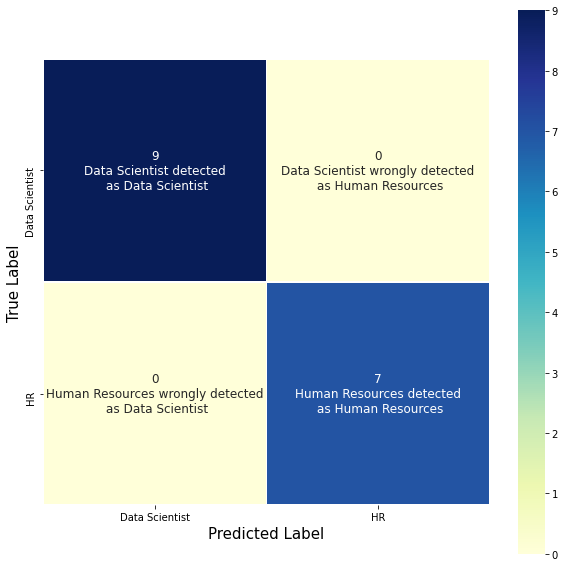

In [0]:
# Confusion Matrix
confusion_matrix = np.asarray(tf.math.confusion_matrix(labels, predictions))
text = np.asarray([['Data Scientist detected\n as Data Scientist', 'Data Scientist wrongly detected\n as Human Resources'], 
                   ['Human Resources wrongly detected\n as Data Scientist', 'Human Resources detected\n as Human Resources']])
text_conf_mat = (np.asarray(["{1:g}\n{0}".format(txt, value) for txt, value in zip(text.flatten(), confusion_matrix.flatten())])).reshape(2,2)

# Plot Confusion Matrix
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(confusion_matrix, 
            linewidths=0.5, cmap="YlGnBu", square=True, 
            xticklabels=['Data Scientist', 'HR'], yticklabels=['Data Scientist', 'HR'],
            annot=text_conf_mat, annot_kws={"size": 12}, fmt="")
plt.xlabel('Predicted Label', fontsize=15)
plt.ylabel('True Label', fontsize=15)

In [0]:
jobs_list = list(job_types_labels.keys())

# Principal Component Analysis in Dimension 2
pca = PCA(n_components=2).fit(profiles_embeddings)
pca_embeddings = pca.transform(profiles_embeddings)

# DataFrame
df = DataFrame({'Summary': [line_jump(profile['text']['en'][:500], every_char=50) for profile in profiles_json],
                'Predicted Category': [jobs_list[pred] for pred in predictions],
                'Category': ['Human Resources' if job=='hr' else 'Data Scientist' for job in job_types],
                'Classification Success': [jobs_list[pred]==job for pred, job in zip(predictions, job_types)],
                'First PCA Axis': pca_embeddings[:, 0], 
                'Second PCA Axis': pca_embeddings[:, 1]})

In [0]:
import plotly.graph_objects as go

# Compute Scores for Mesh Values
h = 0.25
x_min, x_max = -4, 4
y_min, y_max = -4, 4
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Xmesh = np.c_[xx.ravel(), yy.ravel()]
mesh_values = model.predict(pca.inverse_transform(Xmesh))[:,1]

# Contour/Boundary Plot
data = go.Contour(z=mesh_values,
                  x=np.arange(x_min, x_max, h), 
                  y=np.arange(y_min, y_max, h),
                  colorscale=[[0.0, "rgb(165,0,38)"],
                              [0.1111111111111111, "rgb(215,48,39)"],
                              [0.2222222222222222, "rgb(244,109,67)"],
                              [0.3333333333333333, "rgb(253,174,97)"],
                              [0.4444444444444444, "rgb(254,224,144)"],
                              [0.5555555555555556, "rgb(224,243,248)"],
                              [0.6666666666666666, "rgb(171,217,233)"],
                              [0.7777777777777778, "rgb(116,173,209)"],
                              [0.8888888888888888, "rgb(69,117,180)"],
                              [1.0, "rgb(49,54,149)"]])
layout = {'width': 600, 'height': 600, 'showlegend': False, 
          'xaxis_title': 'First PCA Axis', 
          'yaxis_title': 'Second PCA Axis', 'title': 'PCA with Decision Boundaries (HR in red, Data Scientist in Blue)'}
fig = go.Figure(data = data, layout=layout)

# Profiles Embeddings + PCA 2D
scatter = px.scatter(df, x='First PCA Axis', y='Second PCA Axis', 
                     hover_data=['Summary', 'Predicted Category', 'Category', 'Classification Success'],
                     hover_name='Category',
                     color='Predicted Category',
                     color_discrete_sequence=["rgb(165,0,38)", "rgb(49,54,149)"],
                     symbol='Classification Success',
                     symbol_map={True: "circle", False: "square-open"})
scatter.update_traces(marker=dict(size=10, line=dict(width=1, color="rgb(230,230,230)")))
fig.add_trace(scatter.data[0])
fig.add_trace(scatter.data[1])

# Show Graph
fig.show()